<a href="https://colab.research.google.com/github/thanugeorge13/ML/blob/main/MLLab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

1. LINEAR REGRESSION


canada_per_capita_income.csv

In [4]:
df3=pd.read_csv('/content/canada_per_capita_income.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


Predicted per capita income for 2020: 41288.69
Coefficient (m): 828.47
Intercept (b): -1632210.76
Manual calculation for 2020: 41288.69
Predicted per capita income for 2025: 45431.02


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


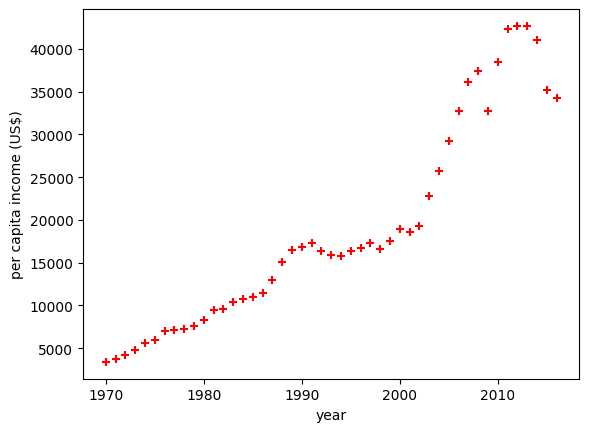

In [8]:
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(df3.year, df3['per capita income (US$)'], color='red', marker='+')


X = df3[['year']]
y = df3['per capita income (US$)']


reg = linear_model.LinearRegression()
reg.fit(X, y)

predicted_income_2020 = reg.predict([[2020]])
print(f"Predicted per capita income for 2020: {predicted_income_2020[0]:.2f}")


print(f"Coefficient (m): {reg.coef_[0]:.2f}")
print(f"Intercept (b): {reg.intercept_:.2f}")


manual_calculation_2020 = reg.coef_[0] * 2020 + reg.intercept_
print(f"Manual calculation for 2020: {manual_calculation_2020:.2f}")


predicted_income_2025 = reg.predict([[2025]])
print(f"Predicted per capita income for 2025: {predicted_income_2025[0]:.2f}")

salary.csv


In [12]:
df4=pd.read_csv('/content/salary.csv')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  28 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [17]:
df4.YearsExperience = df4.YearsExperience.fillna(df4.YearsExperience.median())
df4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


Predicted salary for 12 years experience: 139574.04
Coefficient (m): 9275.93
Intercept (b): 28262.88
Manual calculation for salary for 12 years experience: 139574.04
Predicted salary for 15 years experience: 167401.83


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


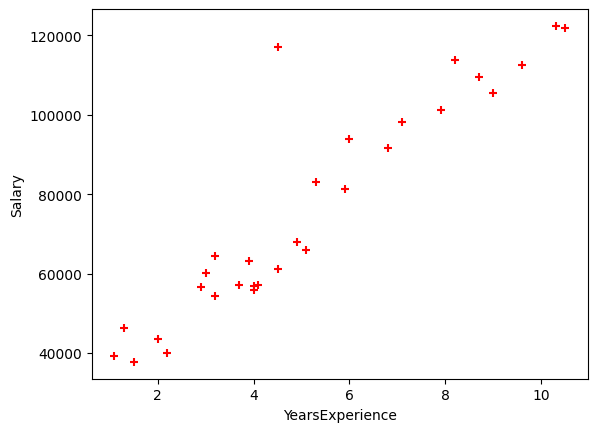

In [21]:
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.scatter(df4.YearsExperience, df4['Salary'], color='red', marker='+')


X = df4[['YearsExperience']]
y = df4['Salary']


reg = linear_model.LinearRegression()
reg.fit(X, y)

predicted_salary_12 = reg.predict([[12]])
print(f"Predicted salary for 12 years experience: {predicted_salary_12[0]:.2f}")


print(f"Coefficient (m): {reg.coef_[0]:.2f}")
print(f"Intercept (b): {reg.intercept_:.2f}")


manual_calculation_12 = reg.coef_[0] * 12 + reg.intercept_
print(f"Manual calculation for salary for 12 years experience: {manual_calculation_12:.2f}")


predicted_salary_15 = reg.predict([[15]])
print(f"Predicted salary for 15 years experience: {predicted_salary_15[0]:.2f}")

2. MULTIPLE LINEAR REGRESSION

hiring.csv

In [22]:
df5=pd.read_csv('/content/hiring.csv')
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


In [30]:
# Fill missing 'test_score(out of 10)' with the median
df5['test_score(out of 10)'] = df5['test_score(out of 10)'].fillna(df5['test_score(out of 10)'].median())

# Convert 'experience' column from words to numbers
word_dict = {
    'zero': 0,
    'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10,
    'eleven': 11, 'twelve': 12
}

df5['experience'] = df5['experience'].fillna('zero')
df5['experience'] = df5['experience'].map(word_dict)
# Display cleaned dataframe info and head
df5.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  8 non-null      int64  
 1   test_score(out of 10)       8 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 388.0 bytes


In [33]:
# Define features (X) and target (y)
X = df5[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = df5['salary($)']

# Create and train the Multiple Linear Regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Predict salary for 2yr experience, 9 test scores, 6 interview score
# Note: The 'experience' column is now numerical
predicted_salary = reg.predict([[2, 9, 6]])
print(f"\nPredicted salary for 2 years experience, 9 test scores, 6 interview score: ${predicted_salary[0]:,.2f}")

'''print(f"\nModel Coefficients: {reg.coef_}")
print(f"Model Intercept: {reg.intercept_}")'''

predicted_salary2 = reg.predict([[12, 10, 10]])
print(f"\nPredicted salary for 12 years experience, 10 test scores, 10 interview score: ${predicted_salary2[0]:,.2f}\n")


Predicted salary for 2 years experience, 9 test scores, 6 interview score: $62,565.06

Predicted salary for 12 years experience, 10 test scores, 10 interview score: $63,653.04



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


companies.csv

In [4]:
df6=pd.read_csv('/content/1000_Companies.csv')
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [19]:
# Use df6 directly (already encoded)
df = df6  # do NOT encode again

# Define features (X) and target (y)
X = df[['R&D Spend', 'Administration', 'Marketing Spend',
        'State_Florida', 'State_New York']]  # order must match your columns
y = df['Profit']

# Create and train the Multiple Linear Regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Predict profit for:
# 91694.48 R&D Spend, 515841.3 Administration, 11931.24 Marketing Spend, Florida
new_data = [[91694.48, 515841.3, 11931.24, 1, 0]]  # Florida=1, New York=0

predicted_profit = reg.predict(new_data)

print(f"\nPredicted Profit: ${predicted_profit[0]:,.2f}")


Predicted Profit: $510,570.99


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
